In [1]:
import datetime
import pandas as pd
import os


#!pip install matplotlib
import matplotlib.pyplot as plt

start_date = datetime.datetime(2018, 2, 1, 0, 0, 0, 0, datetime.timezone.utc)
end_date = datetime.datetime(2018, 3, 1, 23, 0, 0, 0, datetime.timezone.utc)

filelist = ["../raw_data/TweetsBTC_16mil/tweets.csv",
            ]

sep


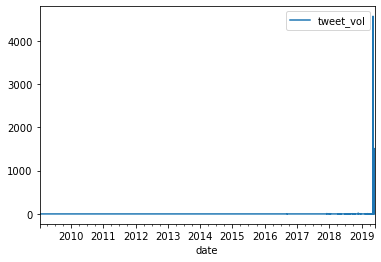

../raw_data/TweetsBTC_16mil/tweets.csv
(100000, 9)


In [2]:
for file_path in filelist:
    try:
        df_chunk = pd.read_csv(file_path, sep=';', chunksize=100000)
        print("sep")
    except:
        df_chunk = pd.read_csv(file_path, lineterminator="\n")
        print("lineterminator")

    for volume_data in df_chunk:
        volume_data["date"] = volume_data["timestamp"]
        volume_data = volume_data.sort_values(by='date')

        try:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M:%S')
        except:
            try:
                volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M')
            except:
                volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S')

        volume_data = volume_data.dropna(subset=['date'])
        volume_data['date'] = volume_data["date"].dt.tz_localize(None)
        volume_data = volume_data.set_index("date")

        grouped_data = volume_data.groupby(pd.Grouper(freq="60Min")).size().reset_index(name='tweet_vol')
        plt.close()
        grouped_data.plot(x='date')
        plt.show()

        print(file_path)
        print(volume_data.shape)
        break


In [5]:
import datetime
import pandas as pd
import os

#!pip install matplotlib
import matplotlib.pyplot as plt

start_date = datetime.datetime(2018, 2, 1, 0, 0, 0, 0, datetime.timezone.utc)
end_date = datetime.datetime(2018, 3, 1, 23, 0, 0, 0, datetime.timezone.utc)

filelist = ["../raw_data/2021/Bitcoin_tweets.csv",
            ]

C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


sep


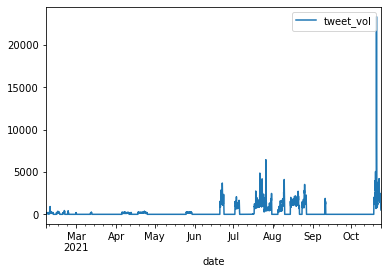

../raw_data/2021/Bitcoin_tweets.csv
(1513416, 12)


In [6]:
for file_path in filelist:
    try:
        volume_data = pd.read_csv(file_path, delimiter=',')
        print("sep")
    except:
        volume_data = pd.read_csv(file_path, lineterminator="\n")
        print("lineterminator")


    volume_data = volume_data.sort_values(by='date')

    try:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M:%S')
    except:
        try:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M')
        except:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

    volume_data = volume_data.dropna(subset=['date'])
    volume_data['date'] = volume_data["date"].dt.tz_localize(None)
    volume_data = volume_data.set_index("date")

    grouped_data = volume_data.groupby(pd.Grouper(freq="60Min")).size().reset_index(name='tweet_vol')
    plt.close()
    grouped_data.plot(x='date')
    plt.show()

    print(file_path)
    print(volume_data.shape)

